In [1]:
# https://dev.to/1n0t/matplotlib-heatmap-calendar-3kbo

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

import yfinance as yf

from datetime import date
from datetime import datetime

import os

In [3]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
pictures = '/Pictures/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
path_pictures = cwd + pictures
# read data
ETFs = pd.read_excel(path_rsrc + "ETF.xlsx")

In [4]:
ETFs

,COMMUNICATION SERVICES,CONSUMER DISCRETIONARY,CONSUMER STAPLES,ENERGY,FINANCIALS,HEALTH CARE,INDUSTRIALS,MATERIALS,REAL ESTATE,TECHNOLOGY,UTILITIES
0,META,AMZN,PG,XOM,BRK,UNH,UNP,LIN,PLD,MSFT,NEE
1,GOOGL,TSLA,COST,CVX,JPM,LLY,GE,SHW,AMT,AAPL,SO
2,GOOG,MCD,PEP,EOG,V,JNJ,CAT,APD,EQIX,NVDA,DUK
3,DIS,HD,WMT,COP,MA,MRK,HON,FCX,WELL,AVGO,SRE
4,T,NKE,MDLZ,MPC,BAC,ABBV,BA,ECL,CCI,ADBE,AEP
...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,PAYC,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,RHI,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,AAL,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,GNRC,NaN,NaN,NaN,NaN


In [5]:
sector = ETFs.columns[1]
tickers = ETFs[sector]
tickers.dropna(inplace=True)

In [6]:
tickers = tickers.to_list()

In [7]:
tickers[:10]

['AMZN', 'TSLA', 'MCD', 'HD', 'NKE', 'SBUX', 'LOW', 'BKNG', 'TJX', 'CMG']

In [8]:
len(tickers)

53

In [9]:
end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

data = yf.download(tickers, start=start_, end=end_, interval="1wk")

[*********************100%%**********************]  53 of 53 completed


In [10]:
data

Adj Close                                                 \
                  ABNB        AMZN       APTV          AZO       BBWI   
Date                                                                    
2023-10-23  114.089996  127.739998  86.010002  2446.169922  28.115910   
2023-10-30  122.639999  138.600006  77.500000  2574.540039  32.389446   
2023-11-06  118.150002  143.559998  75.930000  2702.340088  30.848986   
2023-11-13  127.150002  145.179993  81.180000  2627.050049  29.179325   
2023-11-20  126.820000  143.899994  80.830002  2676.090088  29.670000   

                                                                   ...  \
                  BBY         BKNG        BWA    CCL          CMG  ...   
Date                                                               ...   
2023-10-23  64.410004  2746.159912  36.680000  11.13  1887.589966  ...   
2023-10-30  67.190002  2858.750000  33.360001  12.55  2040.530029  ...   
2023-11-06  64.120003  3074.229980  32.369999  12.76  2120.580078  ...   
2023-11-13  68.220001  3135.250000  34.419998  14.79  2162.219971  ...   
2023-11-20  67.620003  3145.050049  34.020000  14.20  2197.639893  ...   

              Volume                                                   \
                SBUX       TJX       TPR     TSCO       TSLA     ULTA   
Date                                                                    
2023-10-23  28073800  19117500  14231500  9759900  585973400  3333500   
2023-10-30  70844200  27279400  19528100  5671200  621446800  3433800   
2023-11-06  36170000  31382700  23237500  5265100  613925200  2937900   
2023-11-13  37803000  43132900  22974500  6824500  719922800  3940100   
2023-11-20  15948500  13721400   6254500  2158000  238608100  1174000   

                                                     
                  VFC       WHR      WYNN       YUM  
Date                                                 
2023-10-23   38076300  10082100   8995800   7433800  
2023-10-30  103225600   4823300   8294100  10021700  
2023-11-06   37014400   3572500  27966000   6375300  
2023-11-13   51698300   4808000  15086900   6537800  
2023-11-20   11465100   1971200   3672500   1898700  

[5 rows x 318 columns]

In [11]:
df = data.Close
df

,ABNB,AMZN,APTV,AZO,BBWI,BBY,BKNG,BWA,CCL,CMG,...,SBUX,TJX,TPR,TSCO,TSLA,ULTA,VFC,WHR,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-23,114.089996,127.739998,86.010002,2446.169922,28.290001,64.410004,2746.159912,36.680000,11.13,1887.589966,...,92.019997,87.190002,27.600000,187.809998,207.300003,379.869995,16.900000,102.099998,87.279999,119.440002
2023-10-30,122.639999,138.600006,77.500000,2574.540039,32.590000,67.190002,2858.750000,33.360001,12.55,2040.530029,...,102.650002,91.000000,27.940001,199.279999,219.960007,385.880005,15.500000,111.459999,92.760002,126.339996
2023-11-06,118.150002,143.559998,75.930000,2702.340088,31.040001,64.120003,3074.229980,32.369999,12.76,2120.580078,...,104.330002,91.199997,28.120001,198.539993,214.649994,389.709991,14.900000,109.790001,85.489998,125.949997
2023-11-13,127.150002,145.179993,81.180000,2627.050049,29.360001,68.220001,3135.250000,34.419998,14.79,2162.219971,...,105.570000,88.839996,30.389999,202.610001,234.300003,409.269989,17.209999,112.489998,86.870003,127.660004
2023-11-20,126.820000,143.899994,80.830002,2676.090088,29.670000,67.620003,3145.050049,34.020000,14.20,2197.639893,...,103.690002,89.070000,30.370001,197.449997,241.199997,404.920013,16.530001,108.620003,86.860001,128.240005


---
## Calcular retornos

In [12]:
returns = df.pct_change()
returns

,ABNB,AMZN,APTV,AZO,BBWI,BBY,BKNG,BWA,CCL,CMG,...,SBUX,TJX,TPR,TSCO,TSLA,ULTA,VFC,WHR,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-30,0.074941,0.085017,-0.098942,0.052478,0.151997,0.043161,0.040999,-0.090513,0.127583,0.081024,...,0.115518,0.043698,0.012319,0.061072,0.061071,0.015821,-0.082840,0.091675,0.062786,0.057770
2023-11-06,-0.036611,0.035786,-0.020258,0.049640,-0.047561,-0.045691,0.075376,-0.029676,0.016733,0.039230,...,0.016366,0.002198,0.006442,-0.003713,-0.024141,0.009925,-0.038710,-0.014983,-0.078374,-0.003087
2023-11-13,0.076174,0.011284,0.069143,-0.027861,-0.054124,0.063943,0.019849,0.063330,0.159091,0.019636,...,0.011885,-0.025877,0.080725,0.020500,0.091544,0.050191,0.155034,0.024592,0.016142,0.013577
2023-11-20,-0.002595,-0.008817,-0.004311,0.018667,0.010559,-0.008795,0.003126,-0.011621,-0.039892,0.016381,...,-0.017808,0.002589,-0.000658,-0.025468,0.029449,-0.010629,-0.039512,-0.034403,-0.000115,0.004543


In [13]:
def currentRow(df):
    """
    Choice the last row the present. Besides Takes the max and min values
    of this row.
    Parameters
    ----------
    df: pandas DataFrame
        Dataframea containing returns data.
        
    Returns
    -------
    last_row: pandas Series
        Last returns.
    val_max: int
        Maximum value in last_row.
    val_min: int
        Minimum value in last_row.
    """
    # sort last row values
    last_row = df.iloc[-1].sort_values(ascending=False)
    # max and min values
    val_max = last_row .max()
    val_min = last_row .min()
    
    return last_row, val_max, val_min

In [14]:
last_row, val_max, val_min = currentRow(returns)

In [15]:
last_row

TSLA    0.029449
LULU    0.018772
AZO     0.018667
MCD     0.017117
CMG     0.016381
ORLY    0.015528
ROST    0.014749
BBWI    0.010559
HLT     0.009329
LVS     0.007335
MAR     0.006901
EBAY    0.006228
POOL    0.006225
NKE     0.005568
YUM     0.004543
KMX     0.003908
BKNG    0.003126
TJX     0.002589
MGM     0.001508
GPC     0.000437
RL      0.000411
LKQ     0.000220
WYNN   -0.000115
TPR    -0.000658
HAS    -0.001550
GRMN   -0.001590
ABNB   -0.002595
MHK    -0.003559
APTV   -0.004311
GM     -0.004638
LEN    -0.005569
HD     -0.006281
DRI    -0.006544
EXPE   -0.006673
RCL    -0.006727
F      -0.007790
CZR    -0.007841
DPZ    -0.008351
NVR    -0.008539
BBY    -0.008795
AMZN   -0.008817
DHI    -0.010230
ULTA   -0.010629
PHM    -0.011438
BWA    -0.011621
SBUX   -0.017808
TSCO   -0.025468
ETSY   -0.026748
LOW    -0.027688
WHR    -0.034403
VFC    -0.039512
CCL    -0.039892
NCLH   -0.040188
Name: 2023-11-20 00:00:00, dtype: float64

In [16]:
val_max, val_min

(0.02944939738204, -0.040187566591122215)

---
## Selection
we need to take the 10 best and 10 worst tickers for sector

In [17]:
def selection(serie, n=10, m_round=2):
    """
    if n>= len(serie) an n*2 serie lenght is return. Otherwise the same
    series is return.
    
    Parameters
    ----------
    serie: pandas Series
        Returns.
    n: int
        Amount of best and worst datra selected (each one).
        Default 10.
    m_round_: int
          Digits to Round.
    
    Returns
    -------
    selected: pandas Series
        Series containing best and worst returns.
    """
 
    if len(serie) >= n :         # how many values to select
        best = serie.iloc[:n]
        worst = serie.iloc[-n:]
        selected = pd.concat([best, worst], axis=0)
        selected = (selected * 100).round(m_round)       # porcentual change
    else:
        selected = serie
        selected = (selected * 100).round(m_round)       # porcentual change
        
    return selected

In [18]:
selection_ = selection(last_row)

In [19]:
selection_

TSLA    2.94
LULU    1.88
AZO     1.87
MCD     1.71
CMG     1.64
ORLY    1.55
ROST    1.47
BBWI    1.06
HLT     0.93
LVS     0.73
PHM    -1.14
BWA    -1.16
SBUX   -1.78
TSCO   -2.55
ETSY   -2.67
LOW    -2.77
WHR    -3.44
VFC    -3.95
CCL    -3.99
NCLH   -4.02
Name: 2023-11-20 00:00:00, dtype: float64

---
## Heatmap Returns Plot

In [20]:
def matrix_to_plot(serie):
    """
    Parameters
    ----------
    serie: pandas Series
        Series containing best and worst returns.
        
    Returns
    -------
    new_names: numpy.ndarray
        Names to plot.
    new_array: numpy.ndarray
        Values to plot.
    """
    length = len(serie)
    # the idea is to shape an a X b matrix
    a = int(np.sqrt(length))
    b = int(np.ceil(length/a))
    m_length = a * b                # matrix "length"

    if m_length >= length:
        # compute how many elements need to be add to the array
        diff = abs(length - m_length)
        
        # creatre a diff lenght array 
        add =np.full(diff, np.nan)
        new_array = np.append(serie, add)
        new_array = new_array.reshape(a, b)

        # add names to the plot
        names = serie.index.to_list()
        add_names =np.full(diff, '---')
        new_names = np.append(names, add_names)
        new_names = new_names.reshape(a, b)
        
    return new_names, new_array

In [21]:
new_names, new_array = matrix_to_plot(selection_)

In [22]:
new_names

array([['TSLA', 'LULU', 'AZO', 'MCD', 'CMG'],
       ['ORLY', 'ROST', 'BBWI', 'HLT', 'LVS'],
       ['PHM', 'BWA', 'SBUX', 'TSCO', 'ETSY'],
       ['LOW', 'WHR', 'VFC', 'CCL', 'NCLH']], dtype='<U4')

In [23]:
new_array

array([[ 2.94,  1.88,  1.87,  1.71,  1.64],
       [ 1.55,  1.47,  1.06,  0.93,  0.73],
       [-1.14, -1.16, -1.78, -2.55, -2.67],
       [-2.77, -3.44, -3.95, -3.99, -4.02]])

In [24]:
def heatmap(values, labels, max_, min_, sector):
    """
    Create a heatmap from a numpy array and two lists of labels
    
    Parameters
    ----------
    values: numpy.ndarray
        Values to plot.
    labels: numpy.ndarray
        Names to plot.
    max_: int
        Max return value.
    min_: int
        Min return value.
    sector: string
        Sector name.
    
    """
    cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

    # "RdYlGn"
    fig, ax = plt.subplots()

    # Especificamos paleta de colores a usar y rango de valores a representar.
    ax.imshow(values, cmap=cmap_, vmin=min_*100, vmax=max_*100)
    # borrar axis labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # Reducimos la longitud de las marcas a 0 para que no sean visibles
    ax.tick_params(axis=u'both', which=u'both', length=0)
    for lado in ['left', 'right', 'bottom', 'top']:
        ax.spines[lado].set_visible(False)

    # # Indicamos las posiciones donde dibujaremos la rejilla  
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymax, ymin+1), minor=True)

    # Dibujamos la rejilla de color blanco para que actue como separador.
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    # ax.tick_params(which="minor", bottom=False, left=False)

    for i in range(values.shape[0]):
        for j in range(values.shape[1]):
            # print(i, j, values[i,j])
            text = ax.text(j, i, str(labels[i, j]) + '\n' + str(values[i, j])+'%',
                           ha="center", va="center", color="k", size=6)

    ax.set_title(f"{sector}\n")

    plt.savefig(f"{sector}.png")
    plt.show()

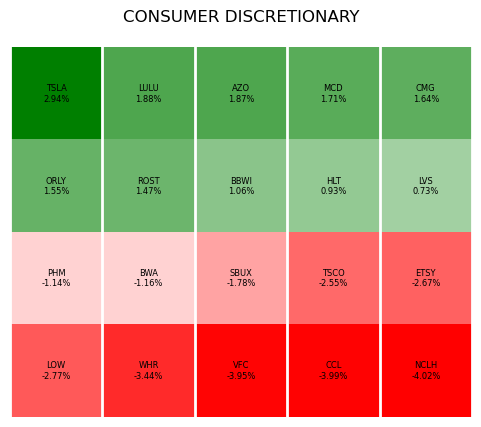

In [25]:
heatmap(values=new_array, labels=new_names, max_=val_max, min_=val_min, sector=sector)

---
# 2. Valuable Sector

In [26]:
ETF_sectors = {
    "XLB": "Materials",
    "XLC": "Telecom",
    "XLE": "Energy",
    "XLF": "Finantials",
    "XLI": "Industrials",
    "XLK": "Technology",
    "XLRE": "Real Estate",
    "XLP": "Consumer Staples",
    "XLU": "Utilities",
    "XLV": "Healthcare",
    "XLY": "Consumer Discretionary",
    "MDY": "mid-sized companies",
    "SLY": "Small Cap ETF",
    "TLT": "20+ Year Treasury Bond",
    "VEA": "Developed Markets Index",
    "VWO": "Emerging Markets Index",
    "SPY": "S&P 500"
}

## download data

In [ ]:
tickers = [i for i in ETF_sectors.keys()]

end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

sectorsETF = yf.download(tickers, start=start_, end=end_, interval="1wk")

In [ ]:
sectors_df = sectorsETF.Close
sectors_df

## Compute returns

In [ ]:
sector_returns = sectors_df.pct_change()

In [ ]:
sector_returns

In [ ]:
# select last row (curernt one)
last_sec_ret, *_ = currentRow(sector_returns)

In [ ]:
last_sec_ret

## Plot values

In [ ]:
import seaborn as sns
# Establecer un tema
sns.set_style("darkgrid")


plt.bar(x=last_sec_ret.index, height=(last_sec_ret.values*100).round(2))
plt.xticks(np.linspace(0, len(last_sec_ret), len(last_sec_ret)), last_sec_ret.index, rotation='vertical')

plt.show()

In [ ]:
def plot_bar_sectors(x, y):
    ax = sns.barplot(x=x, y=y, color="r")
    ax.bar_label(ax.containers[0], fontsize=8);
    ax.set_xticklabels( 
        labels=x, rotation=90, size=8)

    ax.set(xlabel = 'Sectores', ylabel = 'Retorno (%)', title = 'Rendimiento en la última semana de los Sectores')
    
    plt.savefig(f"sectores.png")
    plt.show()

In [ ]:
plot_bar_sectors(x=last_sec_ret.index, y=(last_sec_ret.values*100).round(2))